In [6]:
from derivatives import NoBarrierNoCallable, BarrierNoCallable, NoBarrierCallable, BarrierCallable, Delta, rDivCalibrate, uvCalibrate, replicate, cSolve, alphaSolve, alphaSolveBarrier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import scipy.optimize

# Part 3

In [7]:
# I choose some parameters for example
r = -0.0090
S0 = 11118
div = 0.027
u = 1.01
v = 0.99
c = 0.50
alpha = 1
beta = 0.8
dates = (np.arange(1 / 12, 1 + 1 / 12, 1 / 12))
dt = 1 / 12

riskFreeAsset, riskyAsset = replicate(NoBarrierNoCallable, r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=alpha)
print("To replicate a simple RCN the initial portfolio should be composed of : CHF %d of risk-free asset and CHF %d of risky asset"%(riskFreeAsset, riskyAsset))
riskFreeAsset, riskyAsset = replicate(BarrierNoCallable, r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=alpha, beta=beta)
print("To replicate a barrier RCN the initial portfolio should be composed of : CHF %d of risk-free asset and CHF %d of risky asset"%(riskFreeAsset, riskyAsset))
riskFreeAsset, riskyAsset = replicate(NoBarrierNoCallable, r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=alpha)
print("To replicate a callable RCN the initial portfolio should be composed of : CHF %d of risk-free asset and CHF %d of risky asset"%(riskFreeAsset, riskyAsset))
riskFreeAsset, riskyAsset = replicate(BarrierNoCallable, r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=alpha, beta=beta)
print("To replicate a callable barrier RCN the initial portfolio should be composed of : CHF %d of risk-free asset and CHF %d of risky asset"%(riskFreeAsset, riskyAsset))

To replicate a simple RCN the initial portfolio should be composed of : CHF 447 of risk-free asset and CHF 15933 of risky asset
To replicate a barrier RCN the initial portfolio should be composed of : CHF 475 of risk-free asset and CHF 16328 of risky asset
To replicate a callable RCN the initial portfolio should be composed of : CHF 447 of risk-free asset and CHF 15933 of risky asset
To replicate a callable barrier RCN the initial portfolio should be composed of : CHF 475 of risk-free asset and CHF 16328 of risky asset


# Part 4

## 1. Calibrate r, $\delta$

In [10]:
S0 = 11118
data = pd.read_csv("data.csv")
r, div = rDivCalibrate(data, S0)
r, div

Loading...
/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

(-0.009000000000000001, 0.027)

## 2. Calibrate u, v

In [12]:
dt = 1 / 12
u, v = uvCalibrate(data=data, r=r, dt=dt, S0=S0, div=div, dates=[1])
u, v

Loading...
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

(1.0410099999999956, 0.9529900000000044)

# Part 5

## 1.

### i) Simple RCN

In [14]:
dates = list(np.arange(1 / 12, 1 + 1 / 12, 1 / 12))
price = NoBarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=0.10, alpha=1)
price

11433.656236818473

### ii) Barrier RCN

In [16]:
dates = list(np.arange(1 / 12, 1 + 1 / 12, 1 / 12))
price = BarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=0.10, alpha=1, beta=0.8)
price

11827.6950998646

## 2. par-c of simple and barrier RCNs

Loading...
////////////////////////////////////////

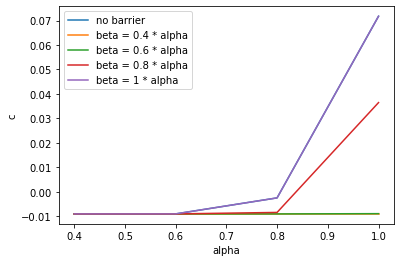

In [18]:
cNoBarrier = np.zeros(4)
cBarrier = np.zeros([4, 4])
alphaRange = [0.4, 0.6, 0.8, 1]
print('Loading...')
for j,alpha in enumerate(alphaRange):
    penalty = lambda x: (NoBarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha) - S0)**2
    cNoBarrier[j] = scipy.optimize.minimize(penalty, x0=0.03, method='Nelder-Mead').x

    print("//", end="")
    for i, beta in enumerate(np.array([0.4, 0.6, 0.8, 1]) * alpha):
        penalty = lambda x: (BarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha, beta=beta) - S0)**2
        cBarrier[i, j] = scipy.optimize.minimize(penalty, x0=0.03, method='Nelder-Mead').x

        print("//", end="")

plt.plot([0.4, 0.6, 0.8, 1], cNoBarrier)
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[0, :])
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[1, :])
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[2, :])
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[3, :])
plt.legend(['no barrier','beta = 0.4 * alpha', 'beta = 0.6 * alpha', 'beta = 0.8 * alpha', 'beta = 1 * alpha'])
plt.ylabel('c')
plt.xlabel('alpha')
plt.show()

## 3. par-$\alpha$ of the simple RCN

Loading...
//////////

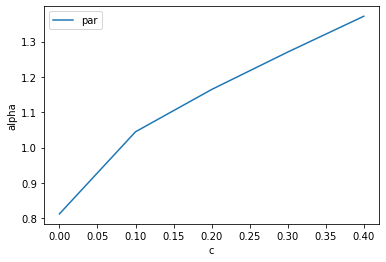

In [20]:
cRange = np.arange(0, 0.5, 0.1)
alphaParNoBarrier = np.empty(cRange.shape)
print('Loading...')
for j, c in enumerate(cRange):
    penalty = lambda x: (NoBarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=x) - S0)**2
    alphaParNoBarrier[j] = scipy.optimize.minimize(penalty, x0 = 1, method='Nelder-Mead').x

    print('//', end='')

plt.plot(cRange, alphaParNoBarrier)
plt.xlabel('c')
plt.ylabel('alpha')
plt.legend(['par'])
plt.show()

## 4. par-$\alpha$ of the barrier RCN

Loading...
////////////////////////////////////////

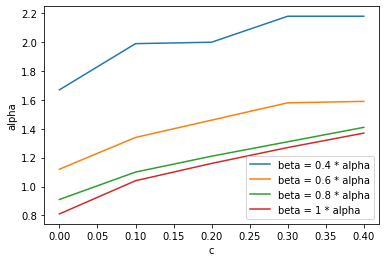

In [22]:
betaCoeffRange = [0.4, 0.6, 0.8, 1]
cRange = np.arange(0, 0.5, 0.1)
alphaParBarrier = np.empty([len(betaCoeffRange), len(cRange)])
print('Loading...')
for j, c in enumerate(cRange):
    for i, betaCoeff in enumerate(betaCoeffRange):
        #penalty = lambda x: (BarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=x, beta=betaCoeff*x) - S0)**2
        #alphaParBarrier[i, j] = scipy.optimize.minimize(penalty, x0=2, method='Nelder-Mead').x

        alphaParBarrier[i, j] = alphaSolveBarrier(BarrierNoCallable, r, dt, S0, div, u, v, dates, c, betaCoeff)

        #f = lambda x: (BarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=x, beta=betaCoeff*x) - S0)
        #alphaParBarrier[i, j] = scipy.optimize.root(f, x0=2).x

        print("//", end="")

plt.plot(cRange, alphaParBarrier[0, :])
plt.plot(cRange, alphaParBarrier[1, :])
plt.plot(cRange, alphaParBarrier[2, :])
plt.plot(cRange, alphaParBarrier[3, :])
plt.legend(['beta = 0.4 * alpha', 'beta = 0.6 * alpha', 'beta = 0.8 * alpha', 'beta = 1 * alpha'])
plt.ylabel('alpha')
plt.xlabel('c')
plt.show()


## 5. par-$\alpha$ of simple vs barrier RCN

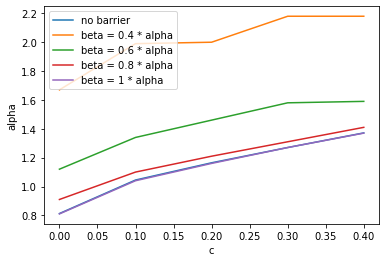

In [24]:
plt.plot(cRange, alphaParNoBarrier)
plt.plot(cRange, alphaParBarrier[0, :])
plt.plot(cRange, alphaParBarrier[1, :])
plt.plot(cRange, alphaParBarrier[2, :])
plt.plot(cRange, alphaParBarrier[3, :])
plt.xlabel('c')
plt.ylabel('alpha')
plt.legend(['no barrier','beta = 0.4 * alpha', 'beta = 0.6 * alpha', 'beta = 0.8 * alpha', 'beta = 1 * alpha'])
plt.show()

## 6.

### i) Callable RCN

In [26]:
dates = list(np.arange(1 / 12, 1 + 1 / 12, 1 / 12))
c = 0.10
alpha =1

price = NoBarrierCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=alpha)
price

11061.567490110401

### ii) Callable barrier RCN

In [28]:
beta = 0.8

price = BarrierCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=c, alpha=alpha, beta=beta)
price

11166.005559759169

# 7. par-c of callable RCN

Loading...
////////////////////////////////////////

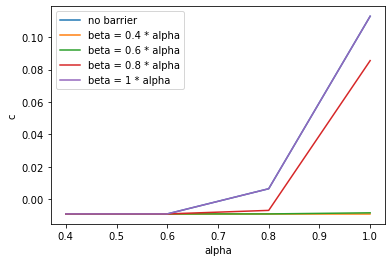

In [30]:
cNoBarrier = np.zeros(4)
cBarrier = np.zeros([4, 4])
print('Loading...')
for j,alpha in enumerate([0.4, 0.6, 0.8, 1]):
    penalty = lambda x: (NoBarrierCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha) - S0)**2
    cNoBarrier[j] = scipy.optimize.minimize(penalty, x0=0.10, method='Nelder-Mead').x
    print("//", end="")
    for i, beta in enumerate(np.array([0.4, 0.6, 0.8, 1]) * alpha):
        f = lambda x: (BarrierCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha, beta=beta) - S0)
        cBarrier[i, j] = scipy.optimize.root(f, x0=0.10).x

        print("//", end="")
plt.plot([0.4, 0.6, 0.8, 1], cNoBarrier)
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[0, :])
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[1, :])
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[2, :])
plt.plot([0.4, 0.6, 0.8, 1], cBarrier[3, :])
plt.legend(['no barrier','beta = 0.4 * alpha', 'beta = 0.6 * alpha', 'beta = 0.8 * alpha', 'beta = 1 * alpha'])
plt.ylabel('c')
plt.xlabel('alpha')
plt.show()

# 8. par-$\alpha$ of callable barrier RCN

Loading...
////////////////////////////////////////

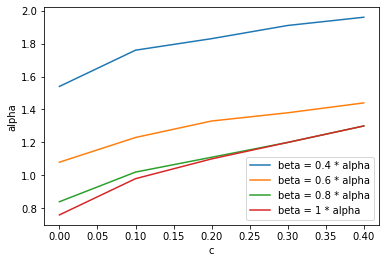

In [46]:
betaCoeffRange = [0.4, 0.6, 0.8, 1]
cRange = np.arange(0, 0.5, 0.1)
alphaParBarrier = np.empty([len(betaCoeffRange), len(cRange)])
print('Loading...')
for j, c in enumerate(cRange):
    for i, betaCoeff in enumerate(betaCoeffRange):
        alphaParBarrier[i, j] = alphaSolveBarrier(BarrierCallable, r, dt, S0, div, u, v, dates, c, betaCoeff)

        print("//", end="")

plt.plot(cRange, alphaParBarrier[0, :])
plt.plot(cRange, alphaParBarrier[1, :])
plt.plot(cRange, alphaParBarrier[2, :])
plt.plot(cRange, alphaParBarrier[3, :])
plt.legend(['beta = 0.4 * alpha', 'beta = 0.6 * alpha', 'beta = 0.8 * alpha', 'beta = 1 * alpha'])
plt.ylabel('alpha')
plt.xlabel('c')
plt.show()


# 9. Term Sheet

Now we are going to propose some different types or RCNs to our investors. The RCNs will be par-valued with annual coupon rate between 5% ad 25%.
We start by analyzing a **simple RCN**.

In [34]:
alpha = 1

penalty = lambda x: (NoBarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha) - S0)**2
cNoBarrierNoCallable = scipy.optimize.minimize(penalty, x0=0.50).x[0]
print("coupon = %.2f %%"%(cNoBarrierNoCallable * 100))

coupon = 7.17 %


Now we consider a **barrier RCN**

In [36]:
alpha = 1
beta = 0.9

penalty = lambda x: (BarrierNoCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha, beta=beta) - S0)**2
cBarrierNoCallable = scipy.optimize.minimize(penalty, x0=0.50).x[0]
print("coupon = %.2f %%"%(cBarrierNoCallable * 100))

coupon = 6.12 %


We consider a **callable RCN**

In [38]:
alpha = 1

penalty = lambda x: (NoBarrierCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha) - S0)**2
cNoBarrierCallable = scipy.optimize.minimize(penalty, x0=0.50).x[0]
print("coupon = %.2f %%"%(cNoBarrierCallable * 100))

coupon = 11.28 %


We consider a **callable barrier RCN**

In [39]:
alpha = 1
beta = 0.9

penalty = lambda x: (BarrierCallable(r=r, dt=dt, S0=S0, div=div, u=u, v=v, dates=dates, c=x, alpha=alpha, beta=beta) - S0)**2
cBarrierCallable = scipy.optimize.minimize(penalty, x0=-1).x[0]
print("coupon = %.2f %%"%(cBarrierCallable * 100))

coupon = 11.20 %
